# **TikTok Project**


# **Objectives**


1. **Develop a Machine Learning Model**: Create a predictive model to classify TikTok videos as containing either a claim or an opinion.  
2. **Enhance Efficiency in Handling User Reports**: Use the predictive model to reduce the backlog of user reports by prioritizing them based on content classification.  
3. **Complete Project Development Steps**: Finalize ongoing work, including:
   - Initial action plan creation.
   - Python-based initial coding.
   - Exploratory Data Analysis (EDA).
   - Hypothesis testing.  
4. **Analyze Hypothesis Testing Results**: Evaluate the relationship between user variables and verified status based on hypothesis testing.  
5. **Explore Verified User Patterns**: Investigate how verified users are associated with posting opinions to refine model predictions.  
6. **Conduct Logistic Regression Analysis**: Use verified status as the outcome variable to understand video characteristics linked to user verification.  
7. **Refine the Final Model**: Incorporate logistic regression insights into the final machine learning model to improve claim vs opinion predictions.  
8. **Support TikTok’s Operations Team**: Provide actionable insights  a Abadi and the operations team to enhance understanding of video characteristics and user behavior patterns.  

# **Steps**


1. **Demonstrate Knowledge of EDA and Regression Models**: Showcase your understanding of Exploratory Data Analysis (EDA) and logistic regression by building and evaluating a predictive model.  
2. **Build a Logistic Regression Model**: Develop a logistic regression model to estimate the probability of a specific outcome using Python.  
3. **Evaluate the Logistic Regression Model**: Assess the model's performance and ensure it meets the assumptions required for logistic regression- 
4. **Part 1: EDA & Checking Model Assumptions**:  
   - Understand the purpose of EDA before constructing a logistic regression model.
   - Identify patterns, relationships, and potential issues in the data-t.  
5. **Part 2: Model Building and Evaluation**:  
   - Utilize appropriate resources and methodologies to construct and evaluate the logistic regression model.
   - Document challenges and resources used during the p-cess.  
6. **Part 3: Interpreting Model Results**:  
   - Extract key insights from the logistic regression model.
   - Formulate business recommendations based on model results.  
7. **Write an Executive Summary**:  
   - Use the PACE Strategy Document to summarize findings, insights, and business recommendations effectively.  
8. **Prepare for Comparison**: Complete the activity to compare your work with a provided exemplar for further learning and refinement.

### **Task 1. Imports and loading**
Import the data and packages for building Logistic regression models.

In [9]:
# Import packages for data manipulation
import pandas as pd 
import numpy as np
# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Load the TikTok dataset.

In [10]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

EDA is the important step in data analytics, we can see the descriptive statistic, outlier, dataset info , data with duplicate and data with missing values. 
In Logistic Regression, we need to see the correlation between variable , to verify model assumptions such as no severe multicollinearity.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

In [11]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [12]:
# Get number of rows and columns
print(f"Total rows : {data.shape[0]}")
print(f"Total columns : {data.shape[1]}")
print(f"Size : {data.size}")

Total rows : 19382
Total columns : 12
Size : 232584


Get the data types of the columns.

In [13]:
# Get data types
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [14]:
# Basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [15]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [16]:
# Object Variable
data.describe(include='object').T

,count,unique,top,freq
claim_status,19084,2,claim,9608
video_transcription_text,19084,19012,a friend read in the media a claim that badmi...,2
verified_status,19382,2,not verified,18142
author_ban_status,19382,3,active,15663


Check for and handle missing values.

In [17]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [18]:
data.loc[data.isna().any(axis=1)].head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,19085,NaN,4380513697,39,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,19086,NaN,8352130892,60,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,19087,NaN,4443076562,25,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,19088,NaN,8328300333,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,19089,NaN,3968729520,8,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [19]:
# Drop rows with missing values
data.dropna(axis=0,inplace=True)

In [20]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [21]:
# Check for duplicates
data.duplicated().sum()

0

Check for and handle outliers.

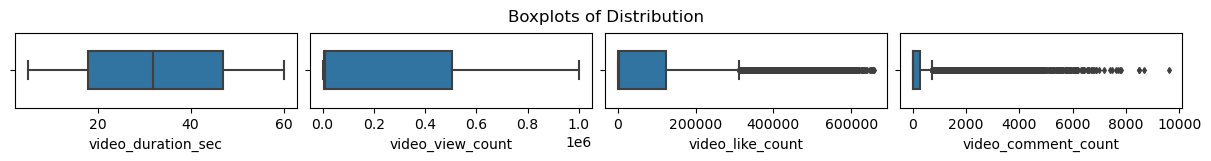

In [22]:
# Create a boxplot to visualize distribution of 
# `video_duration_sec`,`video_view_count`,`video_like_count`,`video_comment_count`

fig, ax = plt.subplots(1,4, figsize=(12,1.5), constrained_layout=True)
fig.suptitle('Boxplots of Distribution')

sns.boxplot(data=data, x='video_duration_sec', ax=ax[0], width=.5,fliersize=3)
sns.boxplot(data=data, x='video_view_count', ax=ax[1], width=.5,fliersize=3)
sns.boxplot(data=data, x='video_like_count', ax=ax[2], width=.5,fliersize=3)
sns.boxplot(data=data, x='video_comment_count', ax=ax[3], width=.5,fliersize=3)

plt.show()


In [26]:
# Outliers imputation with IQR
def imputation(df,columns,iqr_factor):
    for col in columns:
        # Q1 - Q3
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        # IQR 
        iqr = q3 - q1
        # upper limit
        upper_limit = q3 + (iqr_factor * iqr)
        # reassign
        df.loc[df[col] > upper_limit, col] = upper_limit

        print(f"Columns : {col}")
        print(f"Upper Limit : {upper_limit}\n")
        print(f"After : ")
        print(df[col].describe())
        

In [27]:
# Check for and handle outliers for video_like_count
data['video_like_count'].describe()

count     19084.000000
mean      84304.636030
std      133420.546814
min           0.000000
25%         810.750000
50%        3403.500000
75%      125020.000000
max      657830.000000
Name: video_like_count, dtype: float64

In [28]:
# video_like_count imputation
imputation(data,['video_like_count'],1.5)

Columns : video_like_count
Upper Limit : 311333.875

After : 
count     19084.000000
mean      74323.538632
std      107103.555220
min           0.000000
25%         810.750000
50%        3403.500000
75%      125020.000000
max      311333.875000
Name: video_like_count, dtype: float64


In [29]:
# video_comment_count
data['video_comment_count'].describe()

count    19084.000000
mean       349.312146
std        799.638865
min          0.000000
25%          1.000000
50%          9.000000
75%        292.000000
max       9599.000000
Name: video_comment_count, dtype: float64

In [30]:
# video_comment_count imputation
imputation(data,['video_comment_count'],1.5)

Columns : video_comment_count
Upper Limit : 728.5

After : 
count    19084.000000
mean       181.023501
std        272.084766
min          0.000000
25%          1.000000
50%          9.000000
75%        292.000000
max        728.500000
Name: video_comment_count, dtype: float64


Check class balance of the target variable. Remember, the goal is to predict whether the user of a given post is verified or unverified.

In [31]:
# Check class balance
data['verified_status'].value_counts(normalize=True)*100

verified_status
not verified    93.71201
verified         6.28799
Name: proportion, dtype: float64

Approximately 93.7% of the dataset represents videos posted by unverified accounts and 6.3% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [32]:
# Use resampling to create class balance in the outcome variable

# Identify data points from majority and minority classes
data_majority = data.loc[data['verified_status'] == 'not verified']
data_minority = data.loc[data['verified_status'] == 'verified']

# Upsample the minority class ("verified")
minority_upsampled = resample(data_minority,n_samples=len(data_majority),replace=True, random_state=0)

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority,minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled['verified_status'].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

In [33]:
# new class percentage
print('Percentage :')
data_upsampled['verified_status'].value_counts(normalize=True)* 100

Percentage :


verified_status
not verified    50.0
verified        50.0
Name: proportion, dtype: float64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [34]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
verified_and_video_transcription_text = data_upsampled[['verified_status','video_transcription_text']]
verified_and_video_transcription_text.groupby(['verified_status'])[['video_transcription_text']].agg(func= lambda x : np.mean([len(text) for text in x ]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [35]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled['text_length'] = data_upsampled['video_transcription_text'].apply(func=lambda x : len(x))

In [36]:
# Display first few rows of dataframe
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

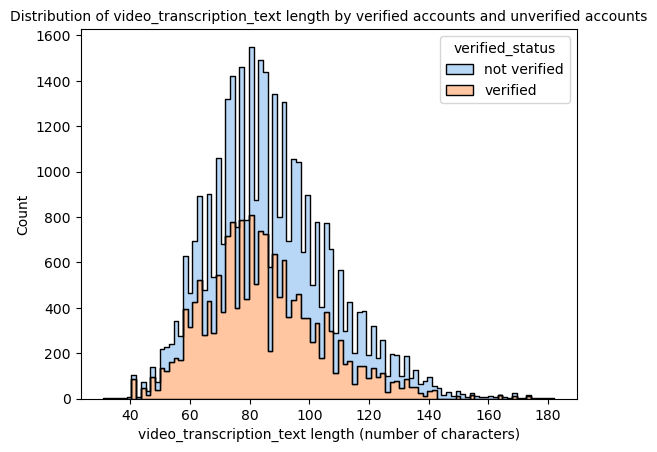

In [37]:
# Visualize the distribution of `video_transcription_text` length by verified accounts and unverified accounts
# Create two histograms in one plot
sns.histplot(data=data_upsampled, x='text_length',hue='verified_status',multiple='stack',element='step',palette='pastel')
plt.xlabel('video_transcription_text length (number of characters)')
plt.title('Distribution of video_transcription_text length by verified accounts and unverified accounts', fontsize=10)
plt.show()

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [38]:
# determine most correlated variables
correlation = data_upsampled.corr(numeric_only=True,method='pearson')
correlation

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


In [39]:
correlation.style.background_gradient('crest')

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


Visualize a correlation heatmap of the data.

<Axes: >

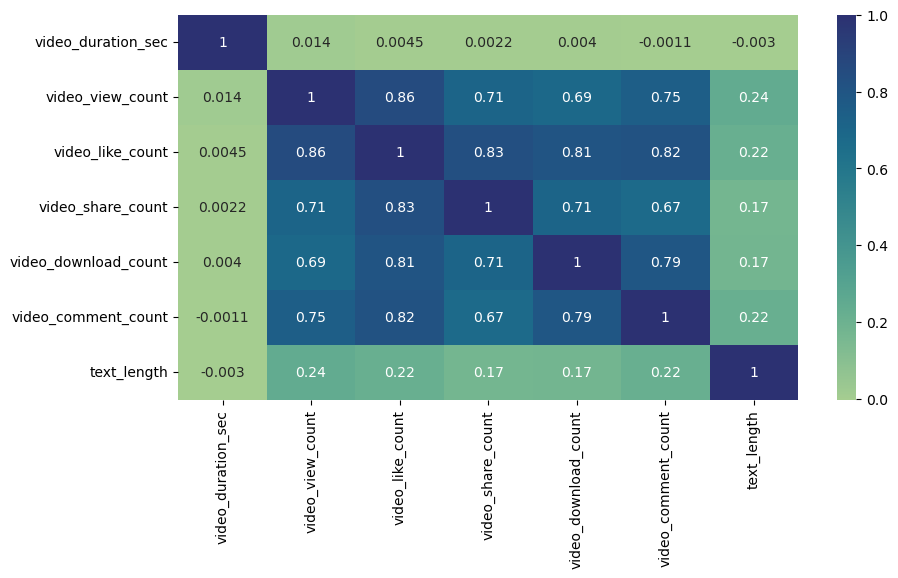

In [40]:
# Create a heatmap to visualize how correlated variables are

plt.figure(figsize=(10,5))
sns.heatmap(data_upsampled[['video_duration_sec', 'video_view_count', 'video_like_count',
       'video_share_count', 'video_download_count', 'video_comment_count',
       'text_length']].corr(),annot=True,cmap='crest')


One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.


The above heatmap shows that the following pair of variables are strongly correlated: video_view_count and video_like_count (0.86 correlation coefficient).

### **Task 3a. Select variables**

Set your Y and X variables.

In [75]:
# Select outcome variable
y = data_upsampled['verified_status']

Select the features.

In [76]:
# Select features
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Display first few rows of features dataframe
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [80]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

### **Task 3c. Encode variables**

Check the data types of the features.

In [82]:
# Check data types
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [83]:
# Get unique values in `claim_status`
X_train['claim_status'].unique()


array(['opinion', 'claim'], dtype=object)

In [84]:
# Get unique values in `author_ban_status`
X_train['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [85]:
# Select the training features that needs to be encoded
X_train_encode = X_train[['claim_status','author_ban_status']]

# Display first few rows
X_train_encode

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active
...,...,...
20757,opinion,active
32103,opinion,active
30403,opinion,active
21243,opinion,active


In [86]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [87]:
# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_encode)

In [89]:
# Get feature names from encoder
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [90]:
# Display first few rows of encoded training features
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [91]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
26821,1.0,0.0,0.0
26822,1.0,0.0,0.0
26823,1.0,0.0,0.0
26824,1.0,0.0,0.0


In [92]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [93]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final 

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26821,36,8848.0,441.0,24.0,1.0,1.0,0.0,0.0
26822,25,8821.0,134.0,8.0,1.0,1.0,0.0,0.0
26823,26,958.0,21.0,2.0,0.0,1.0,0.0,0.0
26824,32,8553.0,744.0,62.0,23.0,1.0,0.0,0.0


Check the data type of the outcome variable.

In [94]:
# Check data type of outcome variable
y_train.dtypes

dtype('O')

In [95]:
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [97]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first',sparse_output=False)

In [98]:
# Encode the training outcome variable
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [99]:
# Construct a logistic regression model and fit it to the training set
clf = LogisticRegression(random_state=0,max_iter=800).fit(X_train_final,y_train_final)

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [100]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Display first few rows
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [101]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [102]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [103]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.0,2.0
31748,27,5701.0,157.0,1.0,0.0
20197,31,449767.0,75385.0,5956.0,728.5
5727,19,792813.0,56597.0,5146.0,728.5
11607,54,2044.0,68.0,19.0,2.0


In [104]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
### YOUR CODE HERE ###
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,728.5,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [105]:
# Use the logistic regression model to get predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred = clf.predict(X_test_final)

Display the predictions on the encoded testing set.

In [106]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

Display the true labels of the testing set.

In [107]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [108]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [109]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

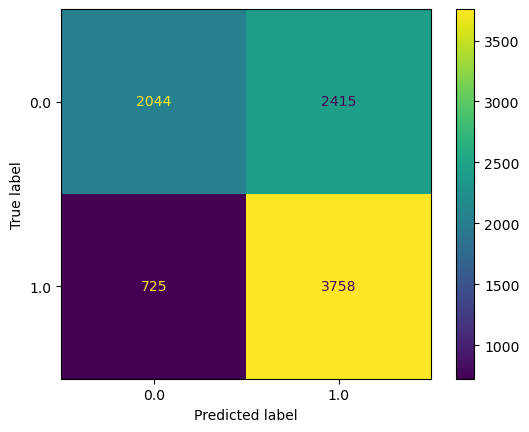

In [111]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [113]:
# Create a classification report
### YOUR CODE HERE ###
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.46      0.57      4459
not verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.64      8942
weighted avg       0.67      0.65      0.64      8942



### **Task 4c. Interpret model coefficients**

In [115]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###
pd.DataFrame(data={"Feature Name":clf.feature_names_in_, "Model Coefficient":clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,8.607893e-03
1,video_view_count,-2.132079e-06
2,video_share_count,5.930971e-06
3,video_download_count,-1.099775e-05
4,video_comment_count,-6.404235e-04
5,claim_status_opinion,3.908384e-04
6,author_ban_status_banned,-1.781741e-05
7,author_ban_status_under review,-9.682447e-07


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

Key takeaways:

- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` from the model building.
- Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status.
- The logistic regression model had not great, but acceptable predictive power: a precision of 61% is less than ideal, but a recall of 84% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable. 


We developed a logistic regression model for verified status based on video features. The model had decent predictive power. Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 